### EDA 프로젝트 진행 순서
- 1. 데이터 불러오기 (친환경 기업, 유류 관련 기업, 유가)
- 2. 데이터 프레임 만들고, 비교할 데이터만 불러오기
    - 기업 : 날짜, 현재가
    - 유가 : 날짜, 종가
- 3. 기업 데이터와 유가 데이터 가공 : merge 사용
    - 데이터 개수 통일
- 4. 친환경 기업, 유류 관련 기업, 유가 간의 상관관계 분석 : preprocessing.minmax_scale 사용
- 5. 상관계수가 높은 순으로 전체 데이터 정렬
- 6. 양의 상관관계 Top 5, 음의 상관관계 Top 5 선그래프로 시각화
- 7. 인사이트 도출

In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
from sklearn import preprocessing


## 1. 데이터 불러오기

### 1-1. 친환경 기업
    - 친환경 자동차 : 풍국주정, 한온시스템
    - 온실가스 : 에코바이오, 세종공업
    - 신재생에너지 : 유니슨, 동국S&C
    => 총 6개 기업

In [2]:
# 퐁국주정 (친환경 자동차)
poonggook_price = pd.read_excel("/Users/seogihyun/Documents/fcdss15/PoongGook.xlsx")
poonggook_price_df = pd.DataFrame(poonggook_price)
poonggook_price_df[["날짜", "현재가"]]

,날짜,현재가
0,2019-12-30,16750
1,2019-12-27,16450
2,2019-12-26,16200
3,2019-12-24,16000
4,2019-12-23,16300
...,...,...
1222,2015-01-08,6293
1223,2015-01-07,6486
1224,2015-01-06,6566
1225,2015-01-05,6600


In [3]:
# 한온 (친환경 자동차)
hanon_price = pd.read_excel("/Users/seogihyun/Documents/fcdss15/Hanon.xlsx")
hanon_price_df = pd.DataFrame(hanon_price)
hanon_price_df[["날짜", "현재가"]]

,날짜,현재가
0,2019-12-30,11150
1,2019-12-27,11250
2,2019-12-26,11400
3,2019-12-24,11350
4,2019-12-23,11250
...,...,...
1222,2015-01-08,9350
1223,2015-01-07,9310
1224,2015-01-06,9360
1225,2015-01-05,9700


In [4]:
# 에코바이오 (온실가스)
echobio_price = pd.read_excel("/Users/seogihyun/Documents/fcdss15/Echobio.xlsx")
echobio_price_df = pd.DataFrame(echobio_price)
echobio_price_df[["날짜", "현재가"]]

,날짜,현재가
0,2019-12-30,4480
1,2019-12-27,4315
2,2019-12-26,4265
3,2019-12-24,4275
4,2019-12-23,4375
...,...,...
1222,2015-01-08,9311
1223,2015-01-07,9050
1224,2015-01-06,9041
1225,2015-01-05,9234


In [5]:
# 세종공업 (온실가스)
sejong_price = pd.read_excel("/Users/seogihyun/Documents/fcdss15/Sejong.xlsx")
sejong_price_df = pd.DataFrame(sejong_price)
sejong_price_df[["날짜", "현재가"]]

,날짜,현재가
0,2019-12-30,4635
1,2019-12-27,4450
2,2019-12-26,4310
3,2019-12-24,4270
4,2019-12-23,4340
...,...,...
1222,2015-01-08,13050
1223,2015-01-07,12700
1224,2015-01-06,12700
1225,2015-01-05,12900


In [6]:
# 유니슨 (신재생에너지)
unison_price = pd.read_excel("/Users/seogihyun/Documents/fcdss15/Unison.xlsx")
unison_price_df = pd.DataFrame(unison_price)
unison_price_df[["날짜", "현재가"]]

,날짜,현재가
0,2019-12-30,1005
1,2019-12-27,993
2,2019-12-26,978
3,2019-12-24,970
4,2019-12-23,1000
...,...,...
1222,2015-01-08,2129
1223,2015-01-07,2155
1224,2015-01-06,2103
1225,2015-01-05,2173


In [7]:
# 동국S&C (신재생에너지)
donggook_price = pd.read_excel("/Users/seogihyun/Documents/fcdss15/Donggook.xlsx")
donggook_price_df = pd.DataFrame(donggook_price)
donggook_price_df[["날짜", "현재가"]]

,날짜,현재가
0,2019-12-30,2575
1,2019-12-27,2595
2,2019-12-26,2615
3,2019-12-24,2535
4,2019-12-23,2455
...,...,...
1222,2015-01-08,3105
1223,2015-01-07,3030
1224,2015-01-06,3020
1225,2015-01-05,2990


### 1-2. 유류 관련 기업 
    - 금호페트롤, 한화솔루션, 포스코케미칼, SK케미칼, 롯데케미칼, Soil
    => 총 6개 기업

In [8]:
# 금호페트롤
geumhopetrol_price = pd.read_excel("/Users/seogihyun/Documents/fcdss15/GeumHoPetrol.xlsx")
geumhopetrol_price_df = pd.DataFrame(geumhopetrol_price)
geumhopetrol_price_df[["날짜", "현재가"]]

,날짜,현재가
0,2019-12-30,77500
1,2019-12-27,78000
2,2019-12-26,78000
3,2019-12-24,77400
4,2019-12-23,77700
...,...,...
1222,2015-01-08,85600
1223,2015-01-07,83300
1224,2015-01-06,81000
1225,2015-01-05,80300


In [9]:
# 한화솔루션
hanhwasolution_price = pd.read_excel("/Users/seogihyun/Documents/fcdss15/HanhwaSolution.xlsx")
hanhwasolution_price_df = pd.DataFrame(hanhwasolution_price)
hanhwasolution_price_df[["날짜", "현재가"]]

,날짜,현재가
0,2019-12-30,18850
1,2019-12-27,18850
2,2019-12-26,18850
3,2019-12-24,18850
4,2019-12-23,19050
...,...,...
1222,2015-01-08,11350
1223,2015-01-07,11200
1224,2015-01-06,11050
1225,2015-01-05,11400


In [10]:
# 포스코케미칼
poscochemical_price = pd.read_excel("/Users/seogihyun/Documents/fcdss15/PoscoChemical.xlsx")
poscochemical_price_df = pd.DataFrame(poscochemical_price)
poscochemical_price_df[["날짜", "현재가"]]

,날짜,현재가
0,2019-12-30,49250
1,2019-12-27,47500
2,2019-12-26,46050
3,2019-12-24,46100
4,2019-12-23,46550
...,...,...
1222,2015-01-08,13980
1223,2015-01-07,14050
1224,2015-01-06,14140
1225,2015-01-05,14140


In [11]:
# SK케미칼
skc_price = pd.read_excel("/Users/seogihyun/Documents/fcdss15/SKC.xlsx")
skc_price_df = pd.DataFrame(skc_price)
skc_price_df[["날짜", "현재가"]]

,날짜,현재가
0,2019-12-30,51000
1,2019-12-27,50500
2,2019-12-26,49750
3,2019-12-24,49900
4,2019-12-23,49300
...,...,...
1222,2015-01-08,26400
1223,2015-01-07,26750
1224,2015-01-06,26750
1225,2015-01-05,26450


In [12]:
# 롯데케미칼
lottechemical_price = pd.read_excel("/Users/seogihyun/Documents/fcdss15/LotteChemical.xlsx")
lottechemical_price_df = pd.DataFrame(lottechemical_price)
lottechemical_price_df[["날짜", "현재가"]]

,날짜,현재가
0,2019-12-30,224000
1,2019-12-27,228500
2,2019-12-26,230500
3,2019-12-24,232000
4,2019-12-23,233000
...,...,...
1222,2015-01-08,145000
1223,2015-01-07,147500
1224,2015-01-06,146000
1225,2015-01-05,155500


In [13]:
# Soil
soil_price = pd.read_excel("/Users/seogihyun/Documents/fcdss15/Soil.xlsx")
soil_price_df = pd.DataFrame(soil_price)
soil_price_df[["날짜", "현재가"]]

,날짜,현재가
0,2019-12-30,95300
1,2019-12-27,96100
2,2019-12-26,95200
3,2019-12-24,97200
4,2019-12-23,97800
...,...,...
1222,2015-01-08,46500
1223,2015-01-07,45300
1224,2015-01-06,45100
1225,2015-01-05,48250


### 1-3. 유가
    - Dubai
    - WTI
    - Brent
    => 총 3개 유류

In [14]:
# Dubai
dubai_price = pd.read_excel("/Users/seogihyun/Documents/fcdss15/Dubai.xlsx")
dubai_price_df = pd.DataFrame(dubai_price)
dubai_price_df[["날짜", "종가"]]

,날짜,종가
0,2019-12-31,67.27
1,2019-12-30,67.81
2,2019-12-27,67.88
3,2019-12-26,67.48
4,2019-12-24,66.77
...,...,...
1224,2015-01-08,47.50
1225,2015-01-07,46.60
1226,2015-01-06,48.08
1227,2015-01-05,50.98


In [15]:
# WTI
wti_price = pd.read_excel("/Users/seogihyun/Documents/fcdss15/WTI.xlsx")
wti_price_df = pd.DataFrame(wti_price)
wti_price_df[["날짜", "종가"]]

,날짜,종가
0,2019-12-31,61.06
1,2019-12-30,61.68
2,2019-12-27,61.72
3,2019-12-26,61.68
4,2019-12-24,61.11
...,...,...
1257,2015-01-08,48.79
1258,2015-01-07,48.65
1259,2015-01-06,47.93
1260,2015-01-05,50.04


In [16]:
# Brent
brent_price = pd.read_excel("/Users/seogihyun/Documents/fcdss15/Brent.xlsx")
brent_price_df = pd.DataFrame(brent_price)
brent_price_df[["날짜", "종가"]]

,날짜,종가
0,2019-12-31,66.00
1,2019-12-30,68.44
2,2019-12-27,68.16
3,2019-12-26,67.92
4,2019-12-24,67.20
...,...,...
1281,2015-01-08,50.96
1282,2015-01-07,51.15
1283,2015-01-06,51.10
1284,2015-01-05,53.11


## 2. 데이터 프레임 만들기

### 2-1. 친환경 기업 데이터 프레임
    - 날짜, 현재가

In [17]:
poonggook_price = pd.read_excel("/Users/seogihyun/Documents/fcdss15/PoongGook.xlsx")
poonggook_price_df = pd.DataFrame(poonggook_price[['날짜', '현재가']])

hanon_price = pd.read_excel("/Users/seogihyun/Documents/fcdss15/Hanon.xlsx")
hanon_price_df = pd.DataFrame(hanon_price[['날짜', '현재가']])

echobio_price = pd.read_excel("/Users/seogihyun/Documents/fcdss15/Echobio.xlsx")
echobio_price_df = pd.DataFrame(echobio_price[['날짜', '현재가']])

sejong_price = pd.read_excel("/Users/seogihyun/Documents/fcdss15/Sejong.xlsx")
sejong_price_df = pd.DataFrame(sejong_price[['날짜', '현재가']])

unison_price = pd.read_excel("/Users/seogihyun/Documents/fcdss15/Unison.xlsx")
unison_price_df = pd.DataFrame(unison_price[['날짜', '현재가']])

donggook_price = pd.read_excel("/Users/seogihyun/Documents/fcdss15/Donggook.xlsx")
donggook_price_df = pd.DataFrame(donggook_price[['날짜', '현재가']])

### 2-2. 유류 관련 기업 데이터 프레임
    - 날짜, 현재가

In [18]:
geumhopetrol_price = pd.read_excel("/Users/seogihyun/Documents/fcdss15/GeumHoPetrol.xlsx")
geumhopetrol_price_df = pd.DataFrame(geumhopetrol_price[['날짜', '현재가']])

hanhwasolution_price = pd.read_excel("/Users/seogihyun/Documents/fcdss15/HanhwaSolution.xlsx")
hanhwasolution_price_df = pd.DataFrame(hanhwasolution_price[['날짜', '현재가']])

poscochemical_price = pd.read_excel("/Users/seogihyun/Documents/fcdss15/PoscoChemical.xlsx")
poscochemical_price_df = pd.DataFrame(poscochemical_price[['날짜', '현재가']])

skchemical_price = pd.read_excel("/Users/seogihyun/Documents/fcdss15/SKC.xlsx")
skchemical_price_df = pd.DataFrame(skchemical_price[['날짜', '현재가']])

lottechemical_price = pd.read_excel("/Users/seogihyun/Documents/fcdss15/LotteChemical.xlsx")
lottechemical_price_df = pd.DataFrame(lottechemical_price[['날짜', '현재가']])

soil_price = pd.read_excel("/Users/seogihyun/Documents/fcdss15/Soil.xlsx")
soil_price_df = pd.DataFrame(soil_price[['날짜', '현재가']])

### 2-3. 유가 데이터 프레임
    - 날짜, 종가

In [19]:
dubai_price = pd.read_excel("/Users/seogihyun/Documents/fcdss15/Dubai.xlsx")
dubai_price_df = pd.DataFrame(dubai_price[["날짜", "종가"]])

wti_price = pd.read_excel("/Users/seogihyun/Documents/fcdss15/WTI.xlsx")
wti_price_df = pd.DataFrame(wti_price[["날짜", "종가"]])

brent_price = pd.read_excel("/Users/seogihyun/Documents/fcdss15/Brent.xlsx")
brent_price_df = pd.DataFrame(brent_price[["날짜", "종가"]])

## 3. 기업 데이터와 유가 데이터 가공 : merge
    - 날짜를 기준으로 현재가, 종가 merge

In [20]:
merge_df = poonggook_price_df[['날짜']]
merge_df["풍국주정_현재가"] = poonggook_price_df[["현재가"]]
merge_df["한온_현재가"] = hanon_price_df[["현재가"]]
merge_df["에코바이오_현재가"] = echobio_price_df[["현재가"]]
merge_df["세종공업_현재가"] = sejong_price_df[["현재가"]]
merge_df["유니슨_현재가"] = unison_price_df[["현재가"]]
merge_df["동국S&C_현재가"] = donggook_price_df[["현재가"]]
merge_df["금호페트롤_현재가"] = geumhopetrol_price_df["현재가"]
merge_df["한화솔루션_현재가"] = hanhwasolution_price_df[['현재가']]
merge_df["포스코케미칼_현재가"] = poscochemical_price_df[["현재가"]]
merge_df["SK케미칼_현재가"] = skchemical_price_df[["현재가"]]
merge_df["롯데케미칼_현재가"] = lottechemical_price_df["현재가"]
merge_df["에스오일_현재가"] = soil_price_df["현재가"]
merge_df["두바이_종가"] = dubai_price_df["종가"]
merge_df["WTI_종가"] = wti_price_df[['종가']]
merge_df["Brent_종가"] = brent_price_df[["종가"]]
merge_df

,날짜,풍국주정_현재가,한온_현재가,에코바이오_현재가,세종공업_현재가,유니슨_현재가,동국S&C_현재가,금호페트롤_현재가,한화솔루션_현재가,포스코케미칼_현재가,SK케미칼_현재가,롯데케미칼_현재가,에스오일_현재가,두바이_종가,WTI_종가,Brent_종가
0,2019-12-30,16750,11150,4480,4635,1005,2575,77500,18850,49250,51000,224000,95300,67.27,61.06,66.00
1,2019-12-27,16450,11250,4315,4450,993,2595,78000,18850,47500,50500,228500,96100,67.81,61.68,68.44
2,2019-12-26,16200,11400,4265,4310,978,2615,78000,18850,46050,49750,230500,95200,67.88,61.72,68.16
3,2019-12-24,16000,11350,4275,4270,970,2535,77400,18850,46100,49900,232000,97200,67.48,61.68,67.92
4,2019-12-23,16300,11250,4375,4340,1000,2455,77700,19050,46550,49300,233000,97800,66.77,61.11,67.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1222,2015-01-08,6293,9350,9311,13050,2129,3105,85600,11350,13980,26400,145000,46500,45.67,49.76,57.10
1223,2015-01-07,6486,9310,9050,12700,2155,3030,83300,11200,14050,26750,147500,45300,47.41,48.17,55.11
1224,2015-01-06,6566,9360,9041,12700,2103,3020,81000,11050,14140,26750,146000,45100,47.50,50.99,56.29
1225,2015-01-05,6600,9700,9234,12900,2173,2990,80300,11400,14140,26450,155500,48250,46.60,49.28,56.41


In [21]:
# 결측값 유무 확인
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227 entries, 0 to 1226
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   날짜          1227 non-null   datetime64[ns]
 1   풍국주정_현재가    1227 non-null   int64         
 2   한온_현재가      1227 non-null   int64         
 3   에코바이오_현재가   1227 non-null   int64         
 4   세종공업_현재가    1227 non-null   int64         
 5   유니슨_현재가     1227 non-null   int64         
 6   동국S&C_현재가   1227 non-null   int64         
 7   금호페트롤_현재가   1227 non-null   int64         
 8   한화솔루션_현재가   1227 non-null   int64         
 9   포스코케미칼_현재가  1227 non-null   int64         
 10  SK케미칼_현재가   1227 non-null   int64         
 11  롯데케미칼_현재가   1227 non-null   int64         
 12  에스오일_현재가    1227 non-null   int64         
 13  두바이_종가      1227 non-null   float64       
 14  WTI_종가      1227 non-null   float64       
 15  Brent_종가    1227 non-null   float64       
dtypes: datetime64[ns](1), fl

## 4. 친환경 기업, 유류 관련 기업, 유가 간의 상관관계 분석
    - 1. Min-Max Nomalization 사용 -> 모든 데이터를 0~1 사이값으로 변경
        - preprocessing.minmax_scale
        - z = (x - min(x)) / (max(x) - min(x))

    - 2. np.corrcoef 사용 -> 상관계수 도출
        - np.corrcoef

In [22]:
# 1. Min-Max Nomalization
poonggook_minmax = preprocessing.minmax_scale(merge_df[::-1]["풍국주정_현재가"])
hanon_minmax = preprocessing.minmax_scale(merge_df[::-1]["한온_현재가"])
echobio_minmax = preprocessing.minmax_scale(merge_df[::-1]["에코바이오_현재가"])
sejong_minmax = preprocessing.minmax_scale(merge_df[::-1]["세종공업_현재가"])
unison_minmax = preprocessing.minmax_scale(merge_df[::-1]["유니슨_현재가"])
donggook_minmax = preprocessing.minmax_scale(merge_df[::-1]["동국S&C_현재가"])

geumhopetrol_minmax = preprocessing.minmax_scale(merge_df[::-1]["금호페트롤_현재가"])
hanhwasolution_minmax = preprocessing.minmax_scale(merge_df[::-1]["한화솔루션_현재가"])
poscochemical_minmax = preprocessing.minmax_scale(merge_df[::-1]["포스코케미칼_현재가"])
skchemical_minmax = preprocessing.minmax_scale(merge_df[::-1]["SK케미칼_현재가"])
lottechemical_minmax = preprocessing.minmax_scale(merge_df[::-1]["롯데케미칼_현재가"])
soil_minmax = preprocessing.minmax_scale(merge_df[::-1]["에스오일_현재가"])

dubai_minmax = preprocessing.minmax_scale(merge_df[::-1]["두바이_종가"])
wti_minmax = preprocessing.minmax_scale(merge_df[::-1]["WTI_종가"])
brent_minmax = preprocessing.minmax_scale(merge_df[::-1]["Brent_종가"])

In [23]:
# 2. 상관계수 도출

# 친환경 기업 - 유류 관련 기업 상관계수
poonggook_geumho = np.corrcoef(poonggook_minmax, geumhopetrol_minmax)[0,1]
poonggook_hanhwa = np.corrcoef(poonggook_minmax, hanhwasolution_minmax)[0,1]
poonggook_posco = np.corrcoef(poonggook_minmax, poscochemical_minmax)[0,1]
poonggook_skc = np.corrcoef(poonggook_minmax, skchemical_minmax)[0,1]
poonggook_lotte = np.corrcoef(poonggook_minmax, lottechemical_minmax)[0,1]
poonggook_soil = np.corrcoef(poonggook_minmax, soil_minmax)[0,1]

hanon_geumho = np.corrcoef(hanon_minmax, geumhopetrol_minmax)[0,1]
hanon_hanhwa = np.corrcoef(hanon_minmax, hanhwasolution_minmax)[0,1]
hanon_posco = np.corrcoef(hanon_minmax, poscochemical_minmax)[0,1]
hanon_skc = np.corrcoef(hanon_minmax, skchemical_minmax)[0,1]
hanon_lotte = np.corrcoef(hanon_minmax, lottechemical_minmax)[0,1]
hanon_soil = np.corrcoef(hanon_minmax, soil_minmax)[0,1]

echobio_geumho = np.corrcoef(echobio_minmax, geumhopetrol_minmax)[0,1]
echobio_hanhwa = np.corrcoef(echobio_minmax, hanhwasolution_minmax)[0,1]
echobio_posco = np.corrcoef(echobio_minmax, poscochemical_minmax)[0,1]
echobio_skc = np.corrcoef(echobio_minmax, skchemical_minmax)[0,1]
echobio_lotte = np.corrcoef(echobio_minmax, lottechemical_minmax)[0,1]
echobio_soil = np.corrcoef(echobio_minmax, soil_minmax)[0,1]

sejong_geumho = np.corrcoef(sejong_minmax, geumhopetrol_minmax)[0,1]
sejong_hanhwa = np.corrcoef(sejong_minmax, hanhwasolution_minmax)[0,1]
sejong_posco = np.corrcoef(sejong_minmax, poscochemical_minmax)[0,1]
sejong_skc = np.corrcoef(sejong_minmax, skchemical_minmax)[0,1]
sejong_lotte = np.corrcoef(sejong_minmax, lottechemical_minmax)[0,1]
sejong_soil = np.corrcoef(sejong_minmax, soil_minmax)[0,1]

unison_geumho = np.corrcoef(unison_minmax, geumhopetrol_minmax)[0,1]
unison_hanhwa = np.corrcoef(unison_minmax, hanhwasolution_minmax)[0,1]
unison_posco = np.corrcoef(unison_minmax, poscochemical_minmax)[0,1]
unison_skc = np.corrcoef(unison_minmax, skchemical_minmax)[0,1]
unison_lotte = np.corrcoef(unison_minmax, lottechemical_minmax)[0,1]
unison_soil = np.corrcoef(unison_minmax, soil_minmax)[0,1]

donggook_geumho = np.corrcoef(donggook_minmax, geumhopetrol_minmax)[0,1]
donggook_hanhwa = np.corrcoef(donggook_minmax, hanhwasolution_minmax)[0,1]
donggook_posco = np.corrcoef(donggook_minmax, poscochemical_minmax)[0,1]
donggook_skc = np.corrcoef(donggook_minmax, skchemical_minmax)[0,1]
donggook_lotte = np.corrcoef(donggook_minmax, lottechemical_minmax)[0,1]
donggook_soil = np.corrcoef(donggook_minmax, soil_minmax)[0,1]


# 친환경 기업 - 유가 상관계수
poonggook_dubai = np.corrcoef(poonggook_minmax, dubai_minmax)[0,1]
poonggook_wti = np.corrcoef(poonggook_minmax, wti_minmax)[0,1]
poonggook_brent = np.corrcoef(poonggook_minmax, brent_minmax)[0,1]

hanon_dubai = np.corrcoef(hanon_minmax, dubai_minmax)[0,1]
hanon_wti = np.corrcoef(hanon_minmax, wti_minmax)[0,1]
hanon_brent = np.corrcoef(hanon_minmax, brent_minmax)[0,1]

echobio_dubai = np.corrcoef(echobio_minmax, dubai_minmax)[0,1]
echobio_wti = np.corrcoef(echobio_minmax, wti_minmax)[0,1]
echobio_brent = np.corrcoef(echobio_minmax, brent_minmax)[0,1]

sejong_dubai = np.corrcoef(sejong_minmax, dubai_minmax)[0,1]
sejong_wti = np.corrcoef(sejong_minmax, wti_minmax)[0,1]
sejong_brent = np.corrcoef(sejong_minmax, brent_minmax)[0,1]

unison_dubai = np.corrcoef(unison_minmax, dubai_minmax)[0,1]
unison_wti = np.corrcoef(unison_minmax, wti_minmax)[0,1]
unison_brent = np.corrcoef(unison_minmax, brent_minmax)[0,1]

donggook_dubai = np.corrcoef(donggook_minmax, dubai_minmax)[0,1]
donggook_wti = np.corrcoef(donggook_minmax, wti_minmax)[0,1]
donggook_brent = np.corrcoef(donggook_minmax, brent_minmax)[0,1]


# 유류 관련 기업 - 유가 상관계수
geumhopetrol_dubai = np.corrcoef(geumhopetrol_minmax, dubai_minmax)[0,1]
geumhopetrol_wti = np.corrcoef(geumhopetrol_minmax, wti_minmax)[0,1]
geumhopetrol_brent = np.corrcoef(geumhopetrol_minmax, brent_minmax)[0,1]

hanhwasolution_dubai = np.corrcoef(hanhwasolution_minmax, dubai_minmax)[0,1]
hanhwasolution_wti = np.corrcoef(hanhwasolution_minmax, wti_minmax)[0,1]
hanhwasolution_brent = np.corrcoef(hanhwasolution_minmax, brent_minmax)[0,1]

poscochemical_dubai = np.corrcoef(poscochemical_minmax, dubai_minmax)[0,1]
poscochemical_wti = np.corrcoef(poscochemical_minmax, wti_minmax)[0,1]
poscochemical_brent = np.corrcoef(poscochemical_minmax, brent_minmax)[0,1]

skchemical_dubai = np.corrcoef(skchemical_minmax, dubai_minmax)[0,1]
skchemical_wti = np.corrcoef(skchemical_minmax, wti_minmax)[0,1]
skchemical_brent = np.corrcoef(skchemical_minmax, brent_minmax)[0,1]

lottechemical_dubai = np.corrcoef(lottechemical_minmax, dubai_minmax)[0,1]
lottechemical_wti = np.corrcoef(lottechemical_minmax, wti_minmax)[0,1]
lottechemical_brent = np.corrcoef(lottechemical_minmax, brent_minmax)[0,1]

soil_dubai = np.corrcoef(soil_minmax, dubai_minmax)[0,1]
soil_wti = np.corrcoef(soil_minmax, wti_minmax)[0,1]
soil_brent = np.corrcoef(soil_minmax, brent_minmax)[0,1]

In [24]:
# 친환경 기업 - 유류 관련 기업 상관계수

greecor_oilcor = [poonggook_geumho, poonggook_hanhwa, poonggook_posco, poonggook_skc, poonggook_lotte, poonggook_soil, hanon_geumho, hanon_hanhwa,\
 hanon_posco, hanon_skc, hanon_lotte, hanon_soil, echobio_geumho, echobio_hanhwa, echobio_posco, echobio_skc, echobio_lotte,\
 echobio_soil, sejong_geumho, sejong_hanhwa, sejong_posco, sejong_skc, sejong_lotte, sejong_soil, unison_geumho, unison_hanhwa,\
 unison_posco, unison_skc, unison_lotte, unison_soil, donggook_geumho, donggook_hanhwa, donggook_posco, donggook_skc,\
 donggook_lotte, donggook_soil]
greecor_oilcor_name = ["poonggook_geumho", "poonggook_hanhwa", "poonggook_posco", "poonggook_skc", "poonggook_lotte", "poonggook_soil", "hanon_geumho", "hanon_hanhwa",\
 "hanon_posco", "hanon_skc", "hanon_lotte", "hanon_soil", "echobio_geumho", "echobio_hanhwa", "echobio_posco", "echobio_skc", "echobio_lotte",\
 "echobio_soil", "sejong_geumho", "sejong_hanhwa", "sejong_posco", "sejong_skc", "sejong_lotte", "sejong_soil", "unison_geumho", "unison_hanhwa",\
 "unison_posco", "unison_skc", "unison_lotte", "unison_soil", "donggook_geumho", "donggook_hanhwa", "donggook_posco", "donggook_skc",\
 "donggook_lotte", "donggook_soil"]

cor = pd.DataFrame({"친환경_오일_기업" : greecor_oilcor_name,
                    "친환경_오일_데이터" : greecor_oilcor})
cor.sort_values(by=["친환경_오일_데이터"], axis=0, ascending=False)

,친환경_오일_기업,친환경_오일_데이터
2,poonggook_posco,0.758716
11,hanon_soil,0.695999
31,donggook_hanhwa,0.663287
8,hanon_posco,0.595026
25,unison_hanhwa,0.573900
3,poonggook_skc,0.562210
34,donggook_lotte,0.554554
28,unison_lotte,0.537733
29,unison_soil,0.450678
0,poonggook_geumho,0.404839


In [25]:
# 유류 관련 기업 - 유가 상관계수
oilcor_oil = [geumhopetrol_dubai, geumhopetrol_wti, geumhopetrol_brent, hanhwasolution_dubai, hanhwasolution_wti,\
              hanhwasolution_brent, poscochemical_dubai, poscochemical_wti, poscochemical_brent, skchemical_dubai,\
              skchemical_wti, skchemical_brent, lottechemical_dubai, lottechemical_wti, lottechemical_brent,\
              soil_dubai, soil_wti, soil_brent]

oilcor_oil_name = ["geumhopetrol_dubai", "geumhopetrol_wti", "geumhopetrol_brent", "hanhwasolution_dubai", "hanhwasolution_wti",\
              "hanhwasolution_brent", "poscochemical_dubai", "poscochemical_wti", "poscochemical_brent", "skchemical_dubai",\
              "skchemical_wti", "skchemical_brent", "lottechemical_dubai", "lottechemical_wti", "lottechemical_brent",\
              "soil_dubai", "soil_wti", "soil_brent"]

cors = pd.DataFrame({"오일기업_오일" : oilcor_oil_name,
                    "오일기업_오일_데이터" : oilcor_oil})
cors.sort_values(by=["오일기업_오일_데이터"], axis=0, ascending=False)

,오일기업_오일,오일기업_오일_데이터
2,geumhopetrol_brent,0.827214
0,geumhopetrol_dubai,0.824763
1,geumhopetrol_wti,0.814471
6,poscochemical_dubai,0.760090
8,poscochemical_brent,0.721523
7,poscochemical_wti,0.647378
9,skchemical_dubai,0.639542
17,soil_brent,0.611300
16,soil_wti,0.584992
10,skchemical_wti,0.569586


In [26]:
corr = [poonggook_geumho, poonggook_hanhwa, poonggook_posco, poonggook_skc, poonggook_lotte, poonggook_soil,\
      hanon_geumho, hanon_hanhwa, hanon_posco, hanon_skc, hanon_lotte, hanon_soil,\
      echobio_geumho, echobio_hanhwa, echobio_posco, echobio_skc, echobio_lotte, echobio_soil,\
      sejong_geumho, sejong_hanhwa, sejong_posco, sejong_skc, sejong_lotte, sejong_soil,\
      unison_geumho, unison_hanhwa, unison_posco, unison_skc, unison_lotte, unison_soil,\
      donggook_geumho, donggook_hanhwa, donggook_posco, donggook_skc, donggook_lotte, donggook_soil,\
      poonggook_dubai, poonggook_wti, poonggook_brent,\
      hanon_dubai, hanon_wti, hanon_brent,\
      echobio_dubai, echobio_wti, echobio_brent,\
      sejong_dubai, sejong_wti, sejong_brent,\
      unison_dubai, unison_wti, unison_brent,\
      donggook_dubai, donggook_wti, donggook_brent,\
      geumhopetrol_dubai, geumhopetrol_wti, geumhopetrol_brent,\
      hanhwasolution_dubai, hanhwasolution_wti, hanhwasolution_brent,\
      poscochemical_dubai, poscochemical_wti, poscochemical_brent,\
      skchemical_brent, skchemical_dubai, skchemical_wti,\
      lottechemical_dubai, lottechemical_wti, lottechemical_brent,\
      soil_dubai, soil_wti, soil_brent]

In [27]:
corr_name = ["풍국주정_금호페트롤", "풍국주정_한화솔루션", "풍국주정_포스코케미칼", "풍국주정_SK케미칼", "풍국주정_롯데케미칼", "풍국주정_Soil",\
      "한온_금호페트롤", "한온_한화솔루션", "한온_포스코케미칼", "한온_SK케미칼", "한온_롯데케미칼", "한온_Soil",\
      "에코바이오_금호페트롤", "에코바이오_한화솔루션", "에코바이오_포스코케미칼", "에코바이오_SK케미칼", "에코바이오_롯데케미칼", "에코바이오_Soil",\
      "세종공업_금호페트롤", "세종공업_한화솔루션", "세종공업_포스코케미칼", "세종공업_SK케미칼", "세종공업_롯데케미칼", "세종공업_Soil",\
      "유니슨_금호페트롤", "유니슨_한화솔루션", "유니슨_포스코케미칼", "유니슨_SK케미칼", "유니슨_롯데케미칼", "유니슨_Soil",\
      "동국S&C_금호페트롤", "동국S&C_한화솔루션", "동국S&C_포스코케미칼", "동국S&C_SK케미칼", "동국S&C_롯데케미칼", "동국S&C_Soil",\
      "풍국주정_Dubai", "풍국주정_WTI", "풍국주정_Brent",\
      "한온_Dubai", "한온_WTI", "한온_Brent",\
      "에코바이오_Dubai", "에코바이오_WTI", "에코바이오_Brent",\
      "세종공업_Dubai", "세종공업_WTI", "세종공업_Brent",\
      "유니슨_Dubai", "유니슨_WTI", "유니슨_Brent",\
      "동국S&C_Dubai", "동국S&C_WTI", "동국S&C_Brent",\
      "금호페트롤_Dubai", "금호페트롤_WTI", "금호페트롤_Brent",\
      "한화솔루션_Dubai", "한화솔루션_WTI", "한화솔루션_Brent",\
      "포스코케미칼_Dubai", "포스코케미칼_WTI", "포스코케미칼_Brent",\
      "SK케미칼_Dubai", "SK케미칼_WTI", "SK케미칼_Brent",\
      "롯데케미칼_Dubai", "롯데케미칼_WTI", "롯데케미칼_Brent",\
      "Soil_Dubai", "Soil_WTI", "Soil_Brent"]

In [28]:
# 상관관계 분석 결과
corr_result = pd.DataFrame({"비교 대상" : corr_name,
                            "상관계수" : corr})
corr_result

,비교 대상,상관계수
0,풍국주정_금호페트롤,0.404839
1,풍국주정_한화솔루션,-0.130328
2,풍국주정_포스코케미칼,0.758716
3,풍국주정_SK케미칼,0.562210
4,풍국주정_롯데케미칼,-0.088003
...,...,...
67,롯데케미칼_WTI,0.280692
68,롯데케미칼_Brent,0.237033
69,Soil_Dubai,0.533508
70,Soil_WTI,0.584992


In [29]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', -1)

## 5. 상관계수가 높은 순으로 전체 데이터 정렬

In [30]:
corr_result.sort_values(by=['상관계수'], axis=0, ascending=False)
corr_result["상관계수"] = round(corr_result["상관계수"],2)
corr_result.rename(columns={"상관계수" : "상관계수(%)"}, inplace=True)
corr_result.sort_values(by=['상관계수(%)'], axis=0, ascending=False)

,비교 대상,상관계수(%)
56,금호페트롤_Brent,0.83
54,금호페트롤_Dubai,0.82
55,금호페트롤_WTI,0.81
2,풍국주정_포스코케미칼,0.76
60,포스코케미칼_Dubai,0.76
...,...,...
23,세종공업_Soil,-0.61
42,에코바이오_Dubai,-0.65
44,에코바이오_Brent,-0.67
14,에코바이오_포스코케미칼,-0.72


## 6. 양의 상관관계 Top 5, 음의 상관관계 Top 5 선그래프로 시각화

### 양의 상관관계 Top5

In [31]:
corr_result.sort_values(by=['상관계수(%)'], axis=0, ascending=False).head(5)

,비교 대상,상관계수(%)
56,금호페트롤_Brent,0.83
54,금호페트롤_Dubai,0.82
55,금호페트롤_WTI,0.81
2,풍국주정_포스코케미칼,0.76
60,포스코케미칼_Dubai,0.76


#### 1위 - 금호페트롤 vs Brent 비교 (상관계수 : 0.83)

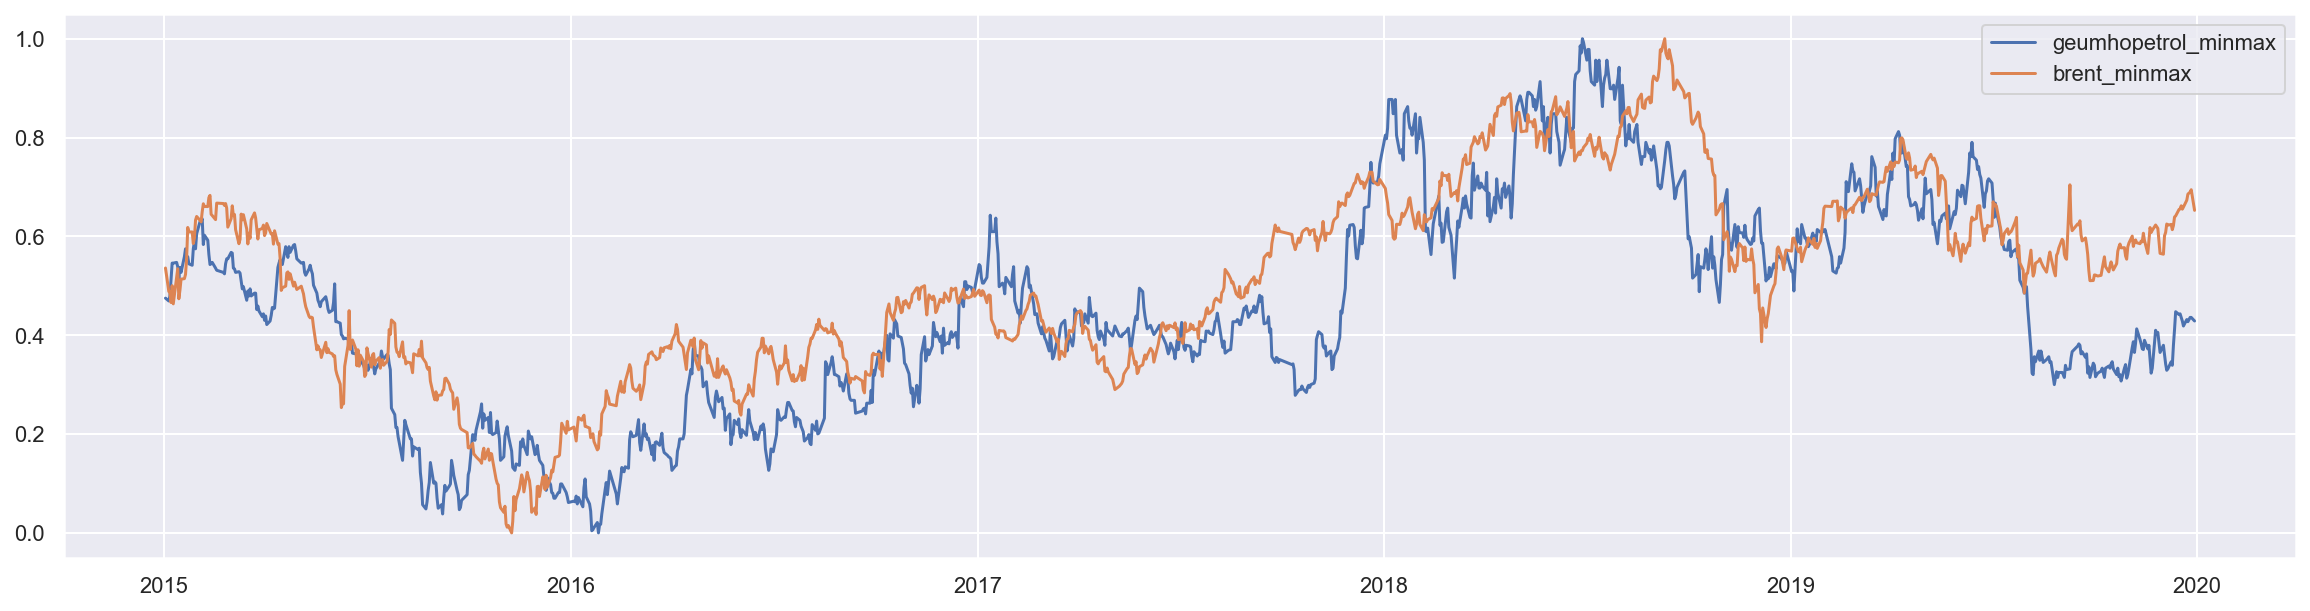

In [32]:
plt.figure(figsize=(20,5))

plt.plot(merge_df[::-1]["날짜"],preprocessing.minmax_scale(merge_df[::-1]["금호페트롤_현재가"]), label="geumhopetrol_minmax")

plt.plot(merge_df[::-1]["날짜"], preprocessing.minmax_scale(merge_df[::-1]["Brent_종가"]), label="brent_minmax")
plt.legend(loc=0);

#### 2위 - 금호페트롤 vs Dubai 비교 (상관계수 : 0.82)

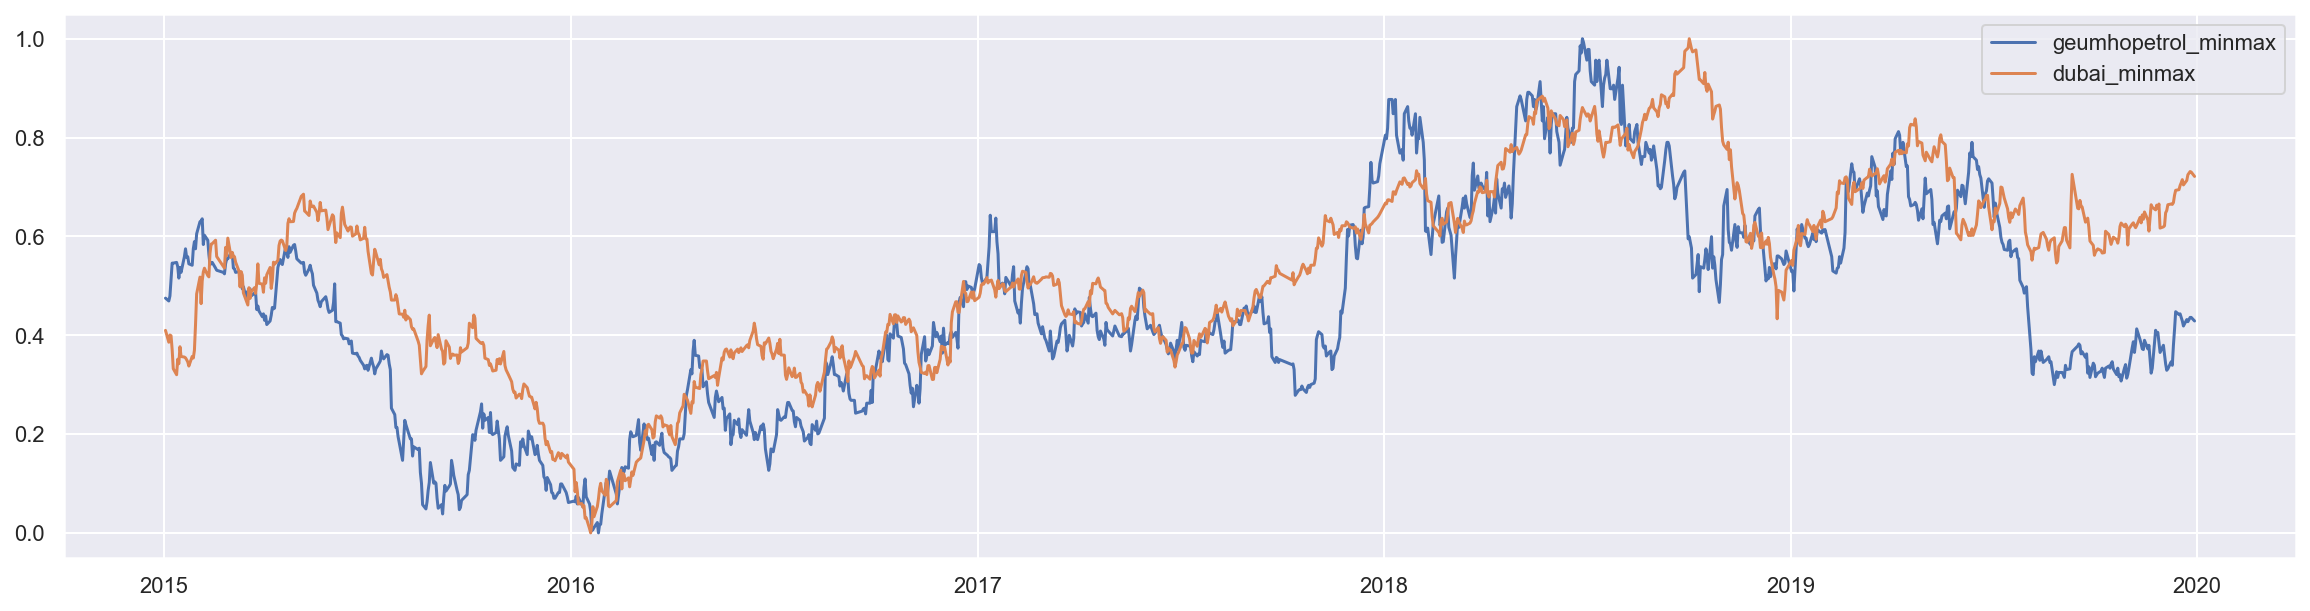

In [33]:
plt.figure(figsize=(20,5))

plt.plot(merge_df[::-1]["날짜"],preprocessing.minmax_scale(merge_df[::-1]["금호페트롤_현재가"]), label="geumhopetrol_minmax")

plt.plot(merge_df[::-1]["날짜"], preprocessing.minmax_scale(merge_df[::-1]["두바이_종가"]), label="dubai_minmax")
plt.legend(loc=0);

#### 3위 - 금호페트롤 vs WTI 비교 (상관계수 : 0.81)

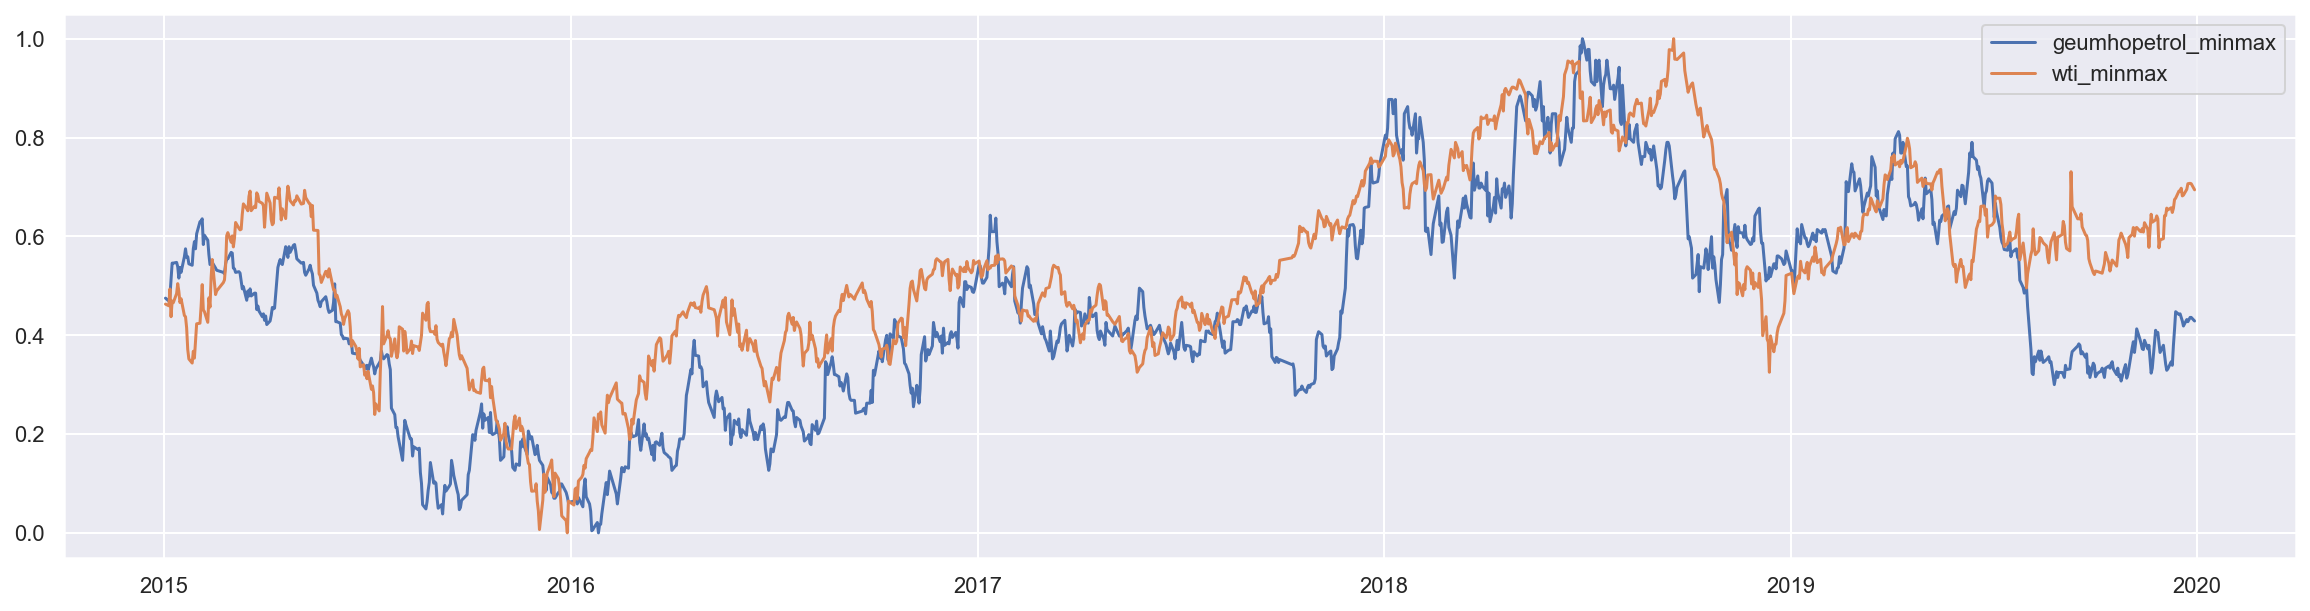

In [34]:
plt.figure(figsize=(20,5))

plt.plot(merge_df[::-1]["날짜"],preprocessing.minmax_scale(merge_df[::-1]["금호페트롤_현재가"]), label="geumhopetrol_minmax")

plt.plot(merge_df[::-1]["날짜"], preprocessing.minmax_scale(merge_df[::-1]["WTI_종가"]), label="wti_minmax")
plt.legend(loc=0);

#### 4위 - 풍국주정 vs 포스코케미칼 비교 (상관계수 : 0.76)

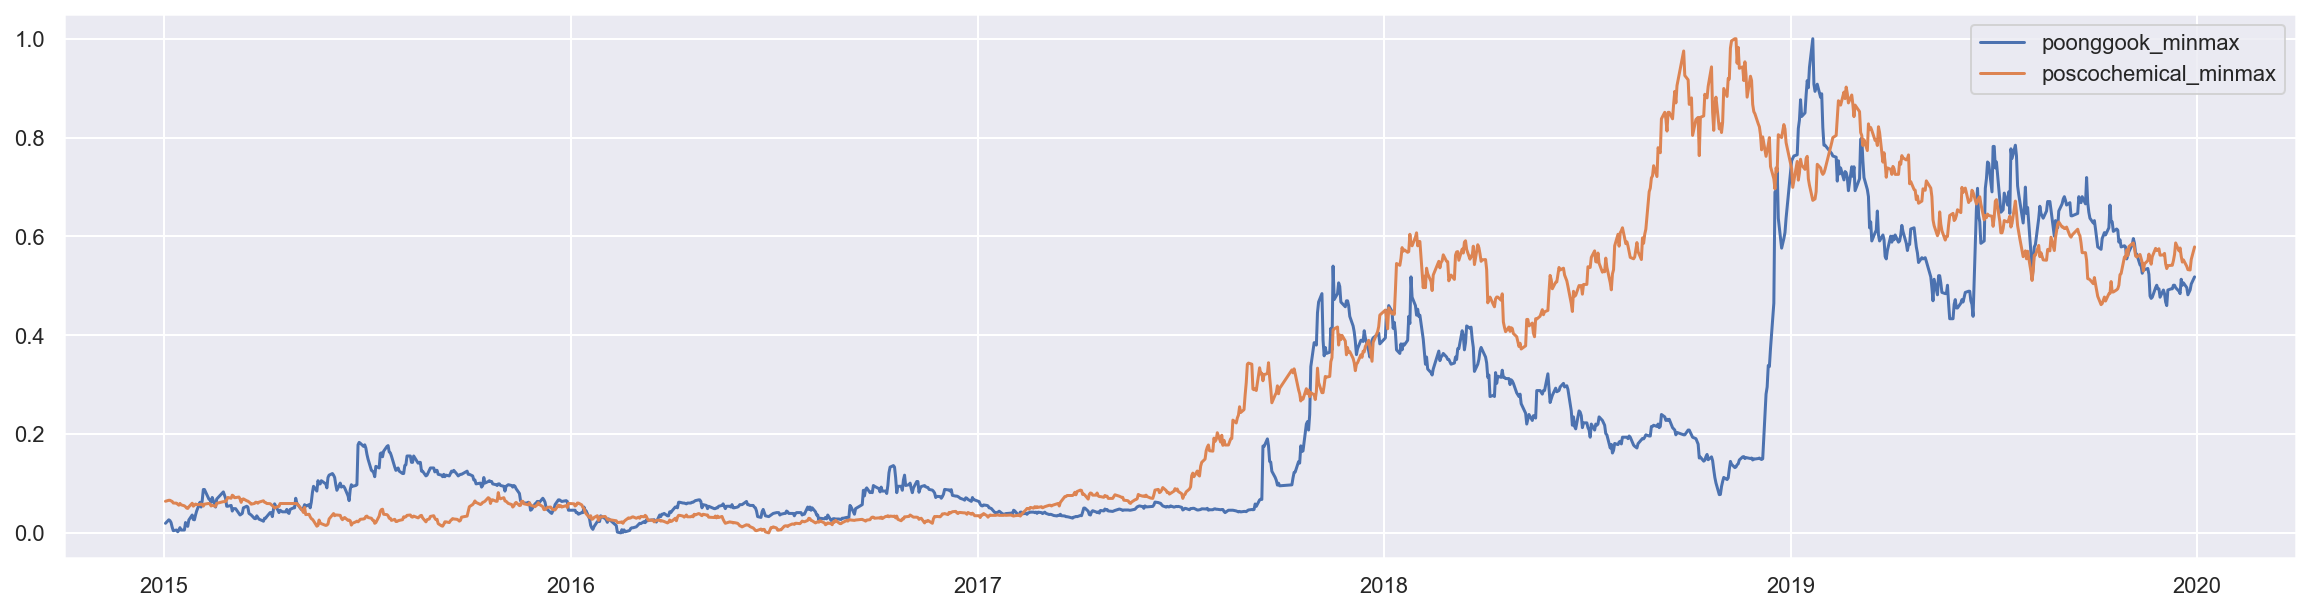

In [35]:
plt.figure(figsize=(20,5))

plt.plot(merge_df[::-1]["날짜"],preprocessing.minmax_scale(merge_df[::-1]["풍국주정_현재가"]), label="poonggook_minmax")

plt.plot(merge_df[::-1]["날짜"], preprocessing.minmax_scale(merge_df[::-1]["포스코케미칼_현재가"]), label="poscochemical_minmax")
plt.legend(loc=0);

#### 5위 - 포스코케미칼 vs Dubai 비교 (상관계수 : 0.76)

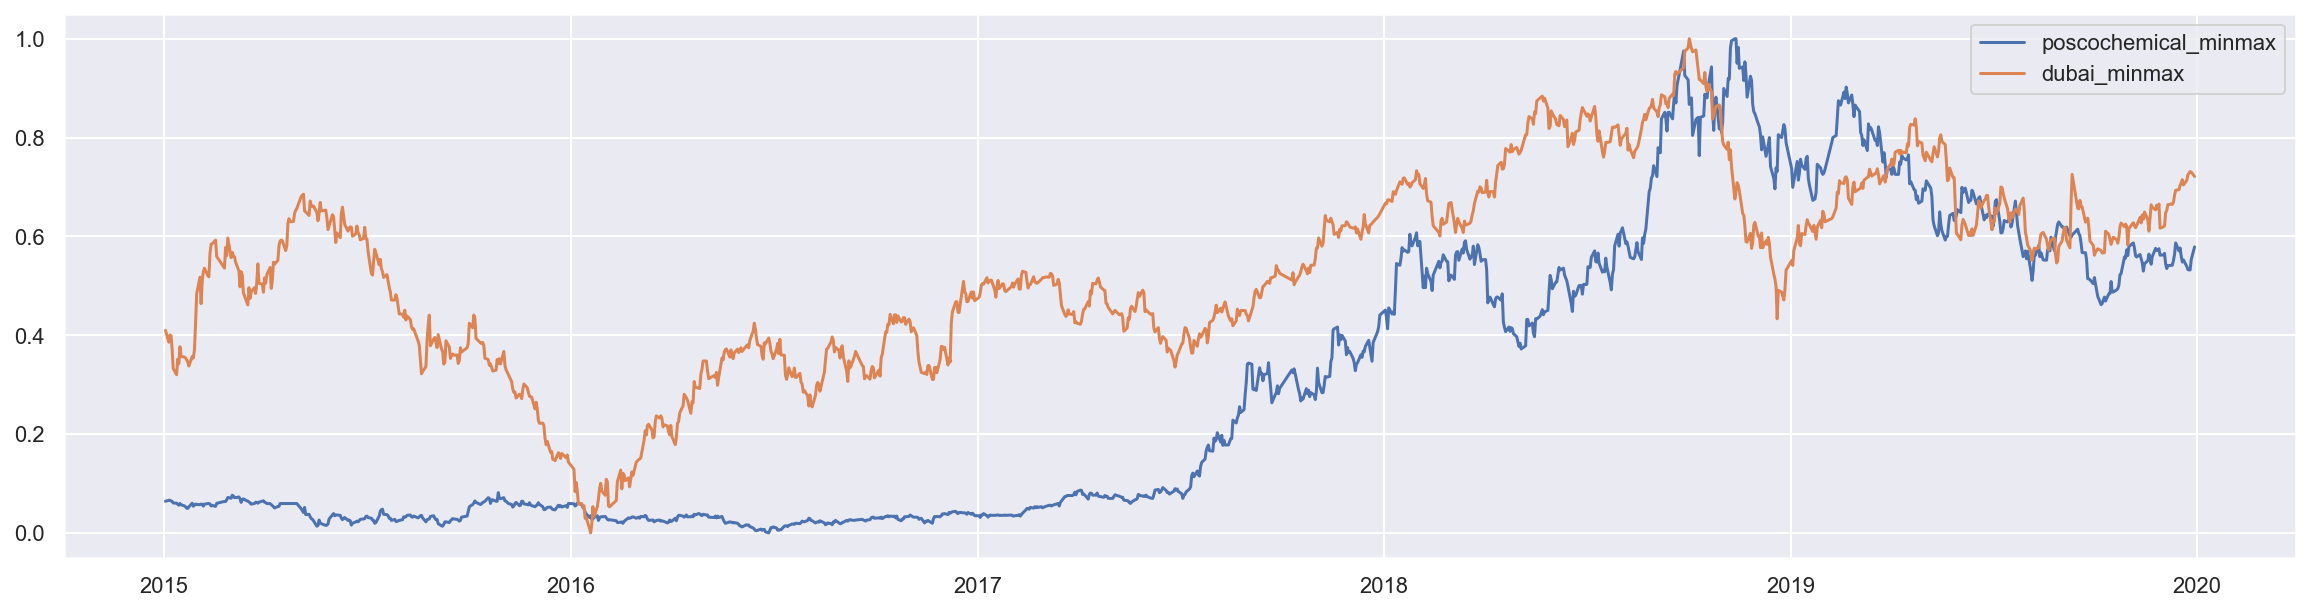

In [36]:
plt.figure(figsize=(20,5))

plt.plot(merge_df[::-1]["날짜"],preprocessing.minmax_scale(merge_df[::-1]["포스코케미칼_현재가"]), label="poscochemical_minmax")

plt.plot(merge_df[::-1]["날짜"], preprocessing.minmax_scale(merge_df[::-1]["두바이_종가"]), label="dubai_minmax")
plt.legend(loc=0);

#### 위의 항목 종류 6개 종합 그래프
    - 포스코케미칼, 금호페트롤, 풍국주정, 두바이, WTI, Brent

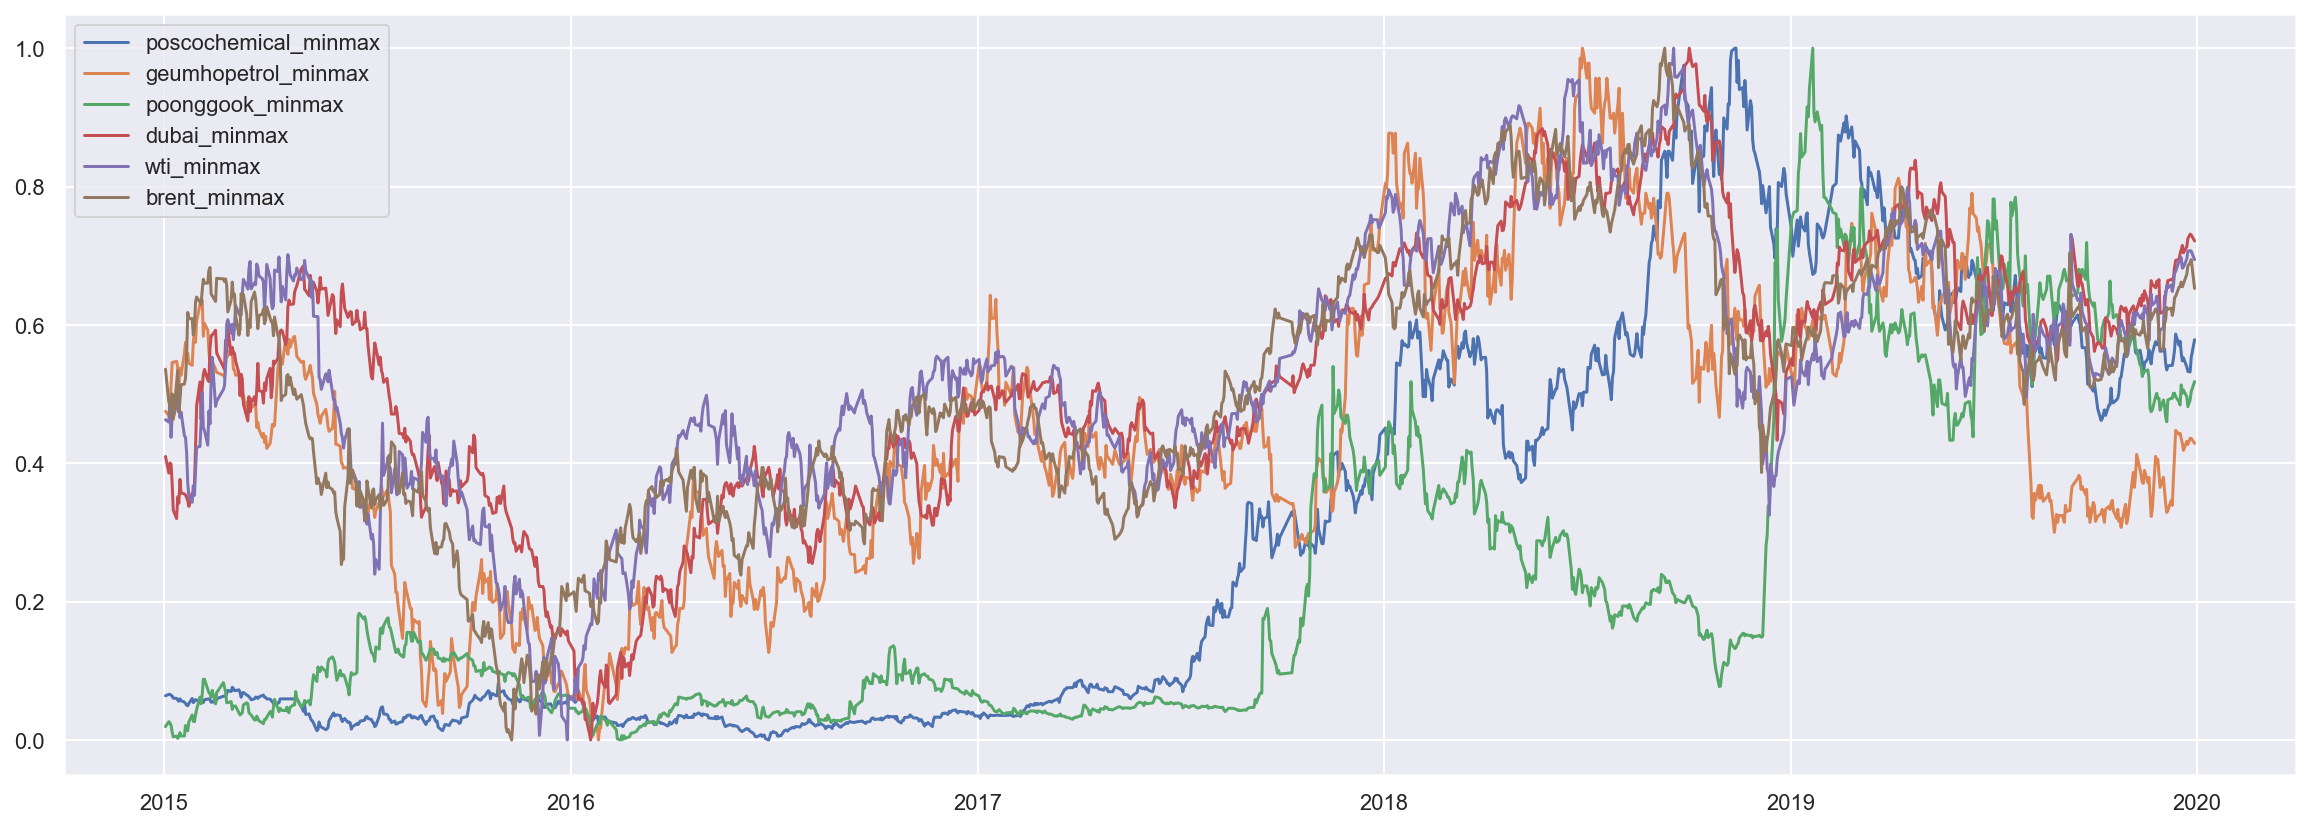

In [37]:
plt.figure(figsize=(20,7))

plt.plot(merge_df[::-1]["날짜"],preprocessing.minmax_scale(merge_df[::-1]["포스코케미칼_현재가"]), label="poscochemical_minmax")

plt.plot(merge_df[::-1]["날짜"],preprocessing.minmax_scale(merge_df[::-1]["금호페트롤_현재가"]), label="geumhopetrol_minmax")

plt.plot(merge_df[::-1]["날짜"],preprocessing.minmax_scale(merge_df[::-1]["풍국주정_현재가"]), label="poonggook_minmax")

plt.plot(merge_df[::-1]["날짜"], preprocessing.minmax_scale(merge_df[::-1]["두바이_종가"]), label="dubai_minmax")

plt.plot(merge_df[::-1]["날짜"], preprocessing.minmax_scale(merge_df[::-1]["WTI_종가"]), label="wti_minmax")

plt.plot(merge_df[::-1]["날짜"], preprocessing.minmax_scale(merge_df[::-1]["Brent_종가"]), label="brent_minmax")

plt.legend(loc=0);

### 음의 상관관계 Top5

In [38]:
corr_result.sort_values(by=['상관계수(%)'], axis=0, ascending=False).tail(5)

,비교 대상,상관계수(%)
23,세종공업_Soil,-0.61
42,에코바이오_Dubai,-0.65
44,에코바이오_Brent,-0.67
14,에코바이오_포스코케미칼,-0.72
20,세종공업_포스코케미칼,-0.78


In [39]:
# 1. Min-Max Nomalization
poonggook_minmax = preprocessing.minmax_scale(merge_df[::-1]["풍국주정_현재가"])
hanon_minmax = preprocessing.minmax_scale(merge_df[::-1]["한온_현재가"])
echobio_minmax = preprocessing.minmax_scale(merge_df[::-1]["에코바이오_현재가"])
sejong_minmax = preprocessing.minmax_scale(merge_df[::-1]["세종공업_현재가"])
unison_minmax = preprocessing.minmax_scale(merge_df[::-1]["유니슨_현재가"])
donggook_minmax = preprocessing.minmax_scale(merge_df[::-1]["동국S&C_현재가"])

geumhopetrol_minmax = preprocessing.minmax_scale(merge_df[::-1]["금호페트롤_현재가"])
hanhwasolution_minmax = preprocessing.minmax_scale(merge_df[::-1]["한화솔루션_현재가"])
poscochemical_minmax = preprocessing.minmax_scale(merge_df[::-1]["포스코케미칼_현재가"])
skchemical_minmax = preprocessing.minmax_scale(merge_df[::-1]["SK케미칼_현재가"])
lottechemical_minmax = preprocessing.minmax_scale(merge_df[::-1]["롯데케미칼_현재가"])
soil_minmax = preprocessing.minmax_scale(merge_df[::-1]["에스오일_현재가"])

dubai_minmax = preprocessing.minmax_scale(merge_df[::-1]["두바이_종가"])
wti_minmax = preprocessing.minmax_scale(merge_df[::-1]["WTI_종가"])
brent_minmax = preprocessing.minmax_scale(merge_df[::-1]["Brent_종가"])

#### 1위 세종공업 vs 포스코케미칼 비교 (상관계수 : -0.78)

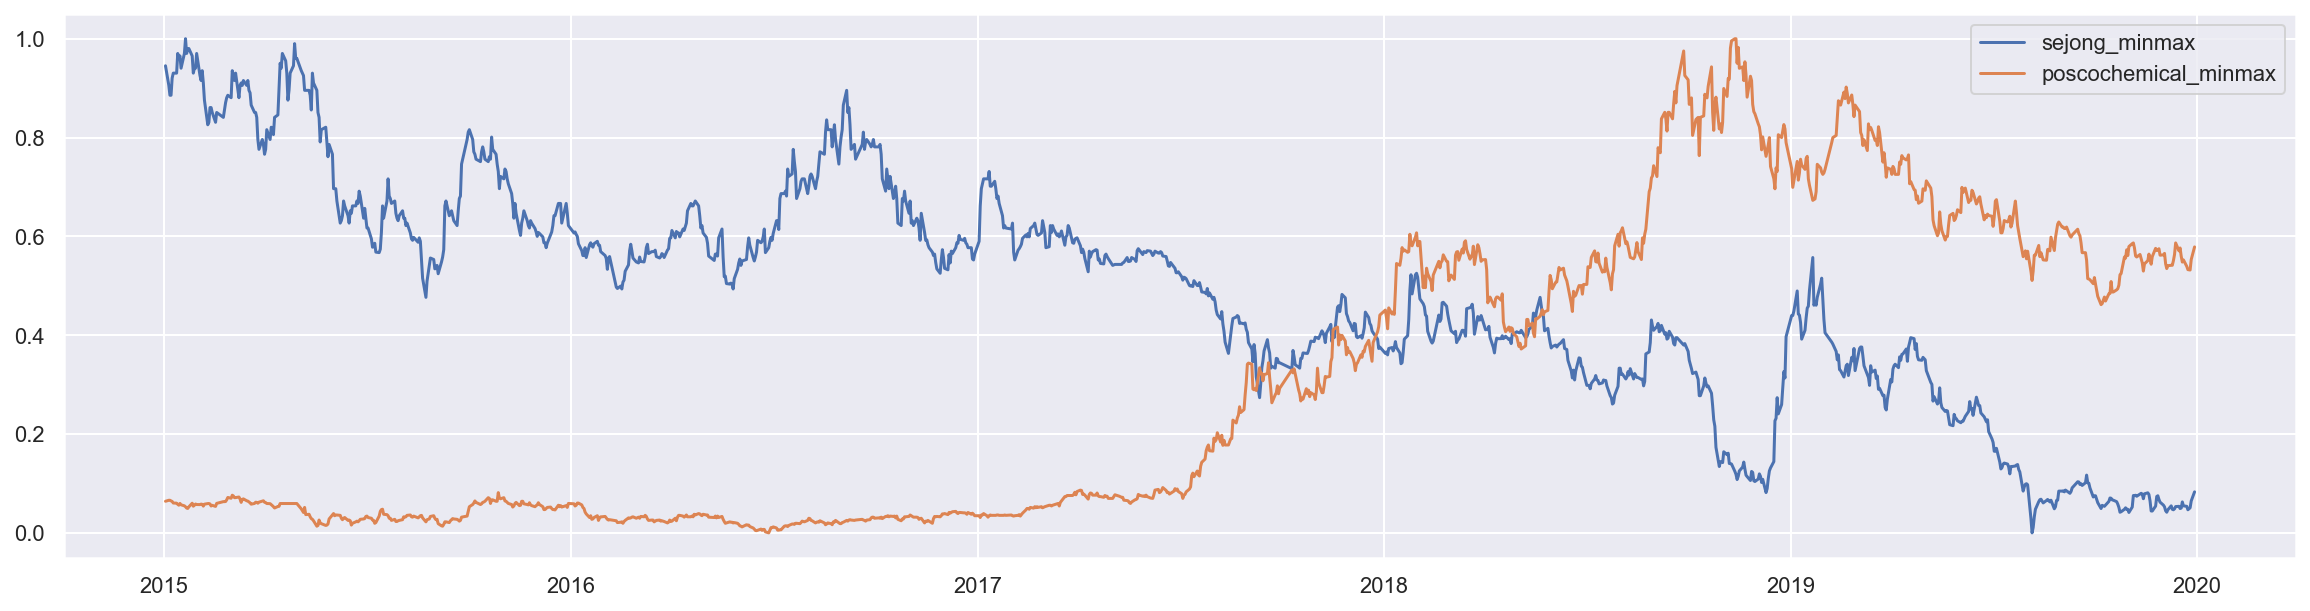

In [40]:
plt.figure(figsize=(20,5))

plt.plot(merge_df[::-1]["날짜"],preprocessing.minmax_scale(merge_df[::-1]["세종공업_현재가"]), label="sejong_minmax")

plt.plot(merge_df[::-1]["날짜"], preprocessing.minmax_scale(merge_df[::-1]["포스코케미칼_현재가"]), label="poscochemical_minmax")
plt.legend(loc=0);

#### 2위 에코바이오 vs 포스코케미칼 비교 (상관계수 : -0.72)

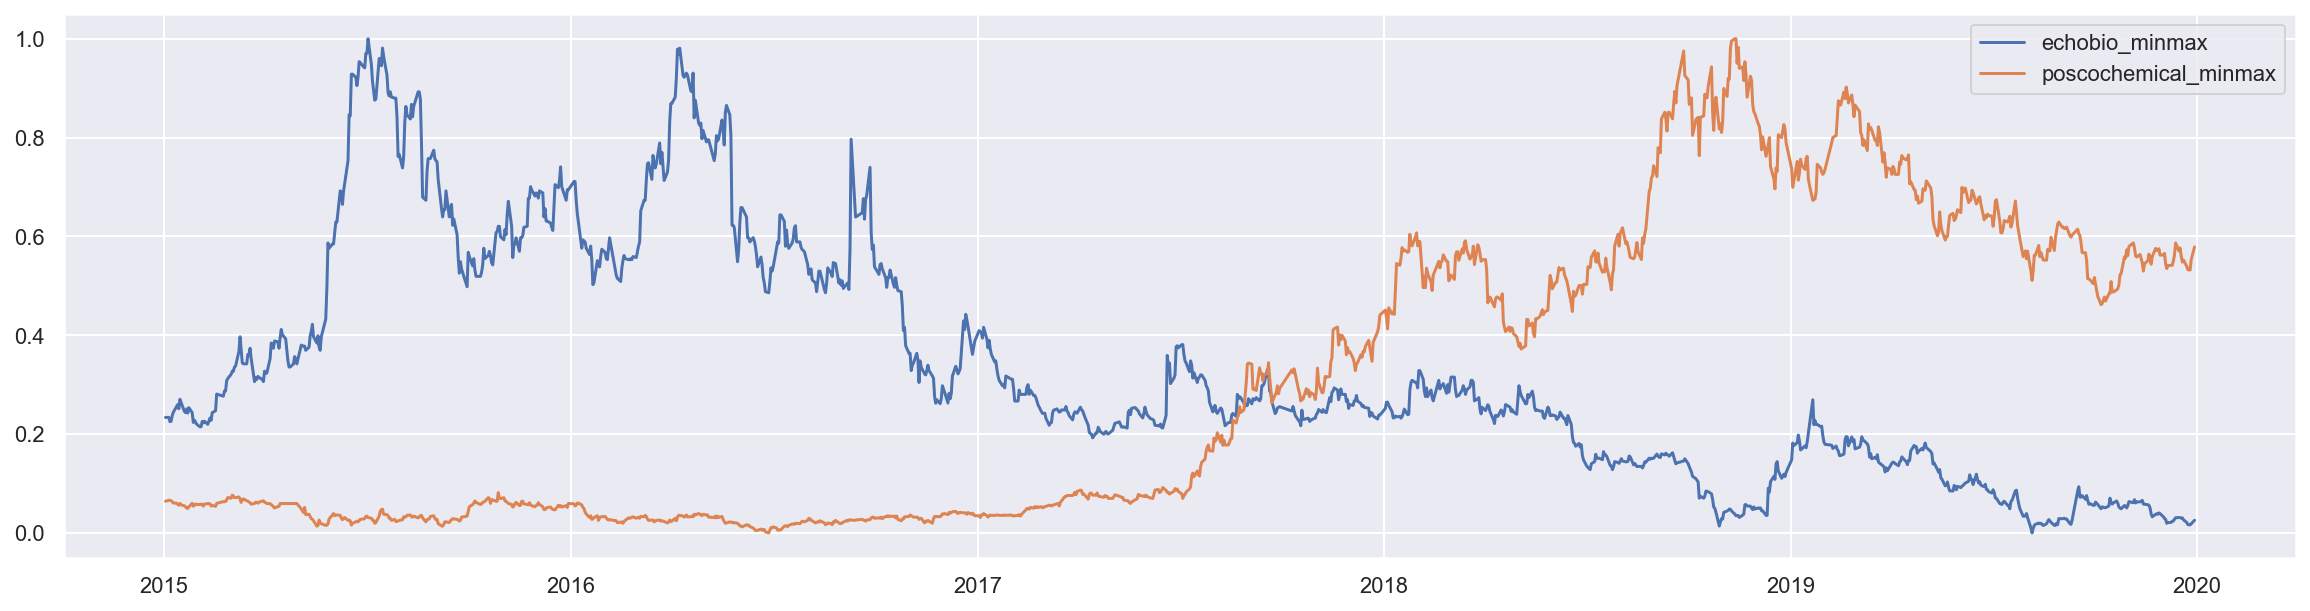

In [41]:
plt.figure(figsize=(20,5))

plt.plot(merge_df[::-1]["날짜"],preprocessing.minmax_scale(merge_df[::-1]["에코바이오_현재가"]), label="echobio_minmax")

plt.plot(merge_df[::-1]["날짜"], preprocessing.minmax_scale(merge_df[::-1]["포스코케미칼_현재가"]), label="poscochemical_minmax")
plt.legend(loc=0);

#### 3위 에코바이오 vs Brent 비교 (상관계수 : -0.67)

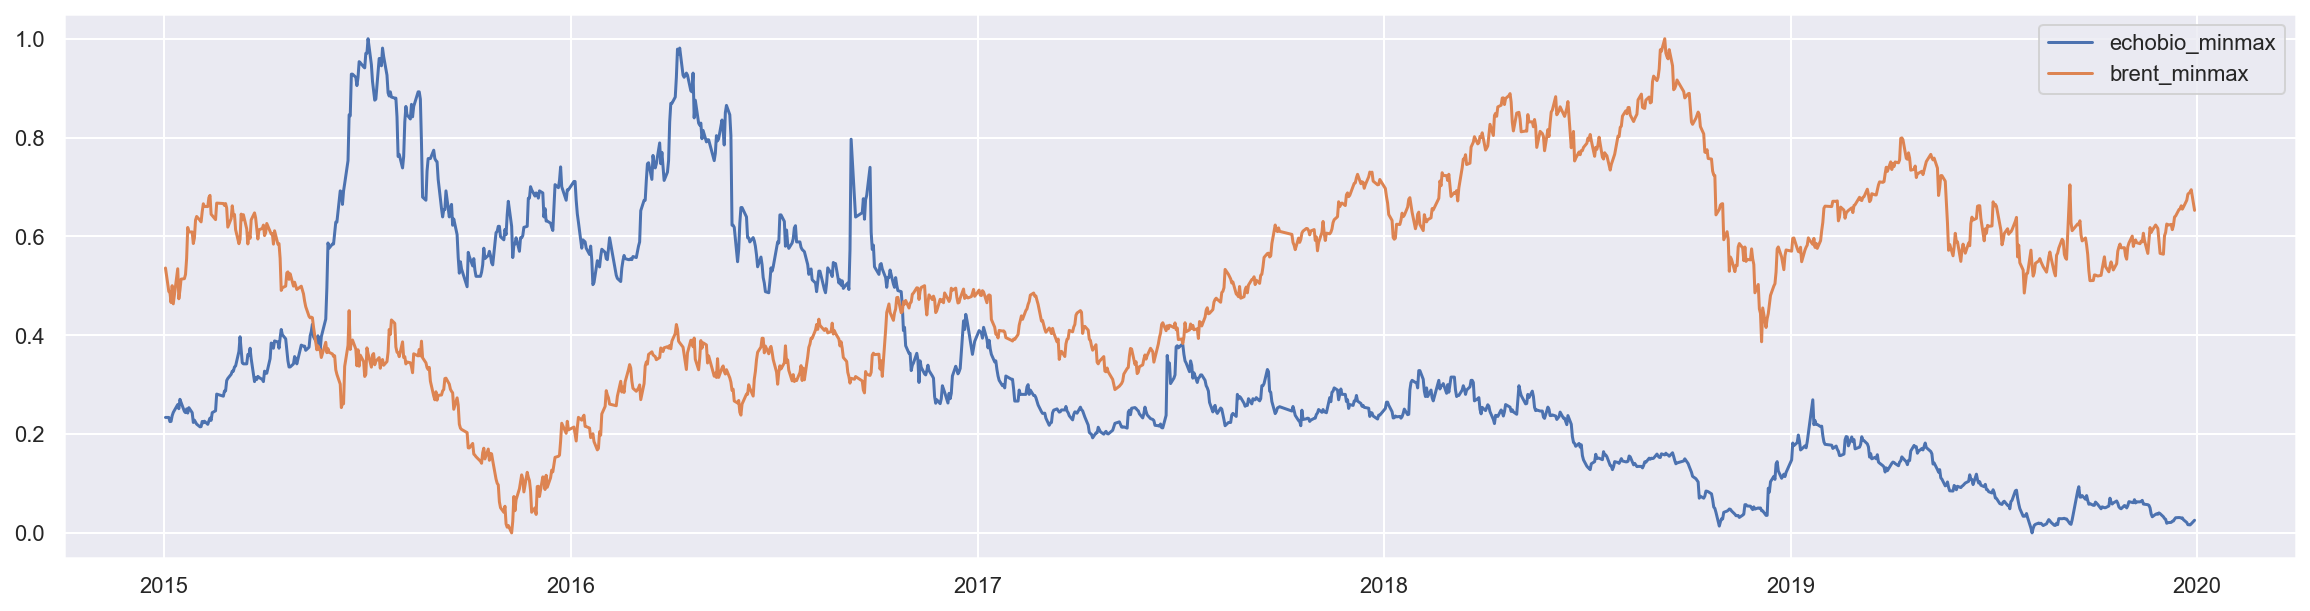

In [42]:
plt.figure(figsize=(20,5))

plt.plot(merge_df[::-1]["날짜"],preprocessing.minmax_scale(merge_df[::-1]["에코바이오_현재가"]), label="echobio_minmax")

plt.plot(merge_df[::-1]["날짜"], preprocessing.minmax_scale(merge_df[::-1]["Brent_종가"]), label="brent_minmax")
plt.legend(loc=0);

#### 4위 에코바이오 vs Dubai 비교 (상관계수 : -0.65)

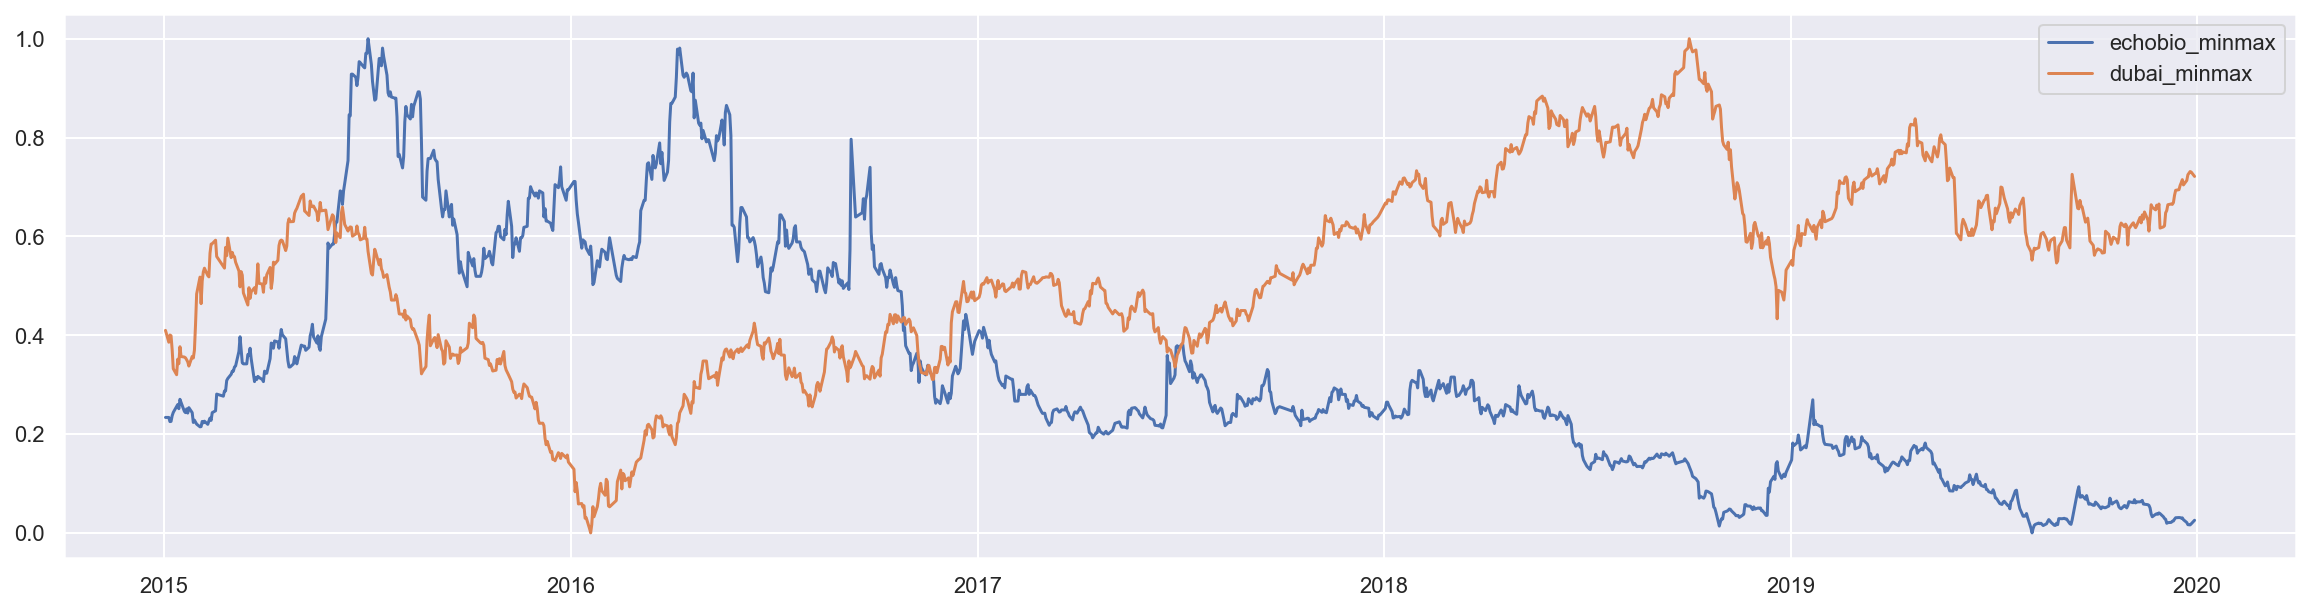

In [43]:
plt.figure(figsize=(20,5))

plt.plot(merge_df[::-1]["날짜"],preprocessing.minmax_scale(merge_df[::-1]["에코바이오_현재가"]), label="echobio_minmax")

plt.plot(merge_df[::-1]["날짜"], preprocessing.minmax_scale(merge_df[::-1]["두바이_종가"]), label="dubai_minmax")
plt.legend(loc=0);

#### 5위 세종공업 vs Soil 비교 (상관계수 : -0.61)

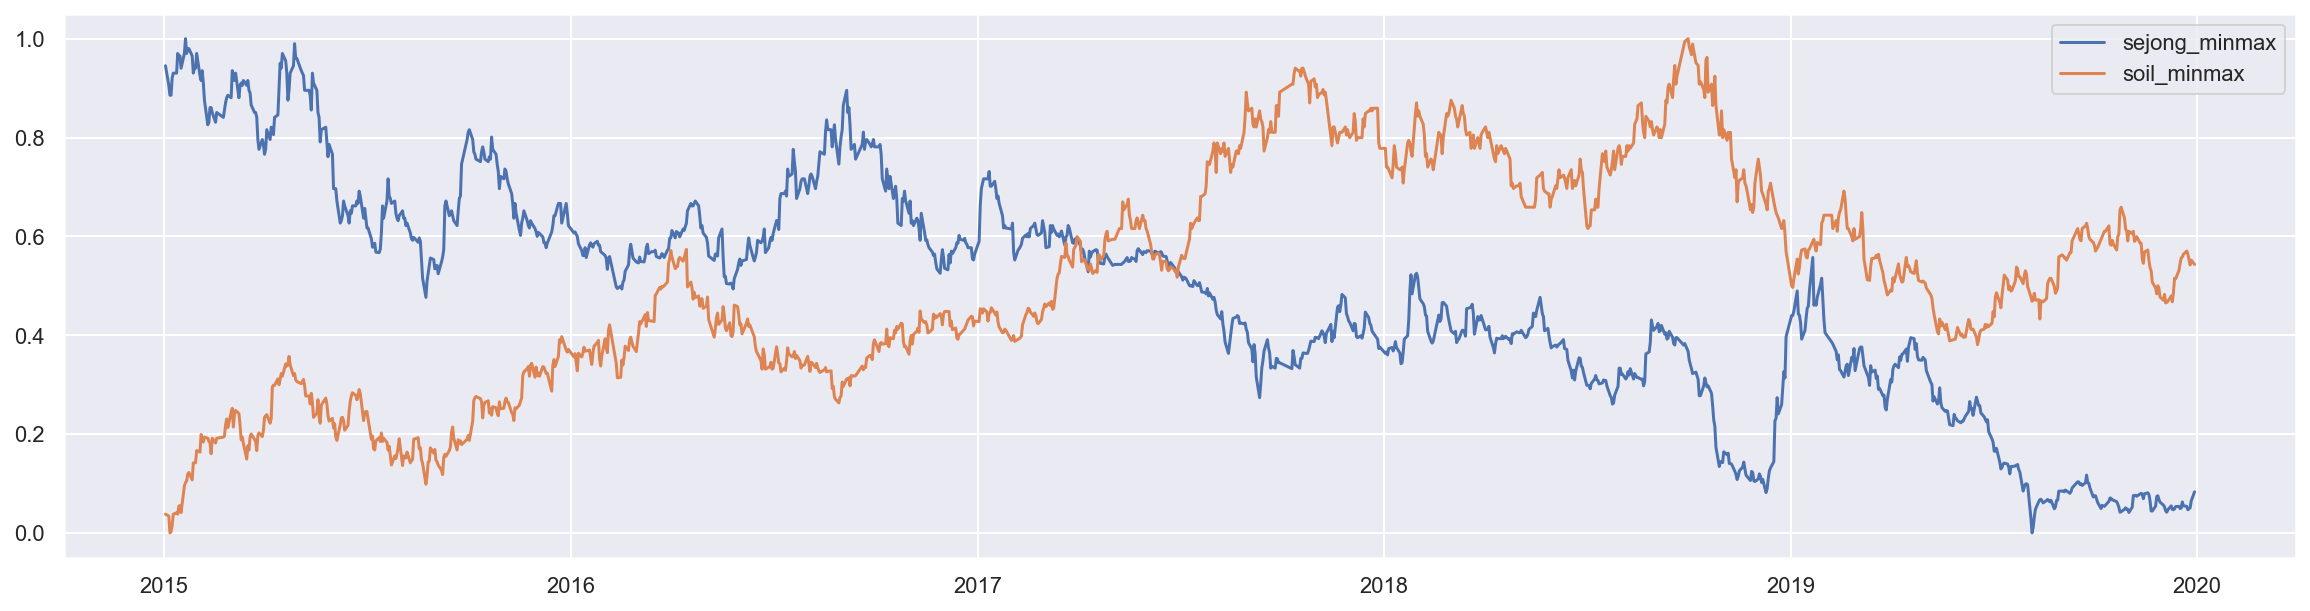

In [44]:
plt.figure(figsize=(20,5))

plt.plot(merge_df[::-1]["날짜"],preprocessing.minmax_scale(merge_df[::-1]["세종공업_현재가"]), label="sejong_minmax")

plt.plot(merge_df[::-1]["날짜"], preprocessing.minmax_scale(merge_df[::-1]["에스오일_현재가"]), label="soil_minmax")
plt.legend(loc=0);

#### 위의 항목 종류 6개 종합 그래프
    - 세종공업, 에코바이오, 포스코케미칼, 두바이, WTI, Brent

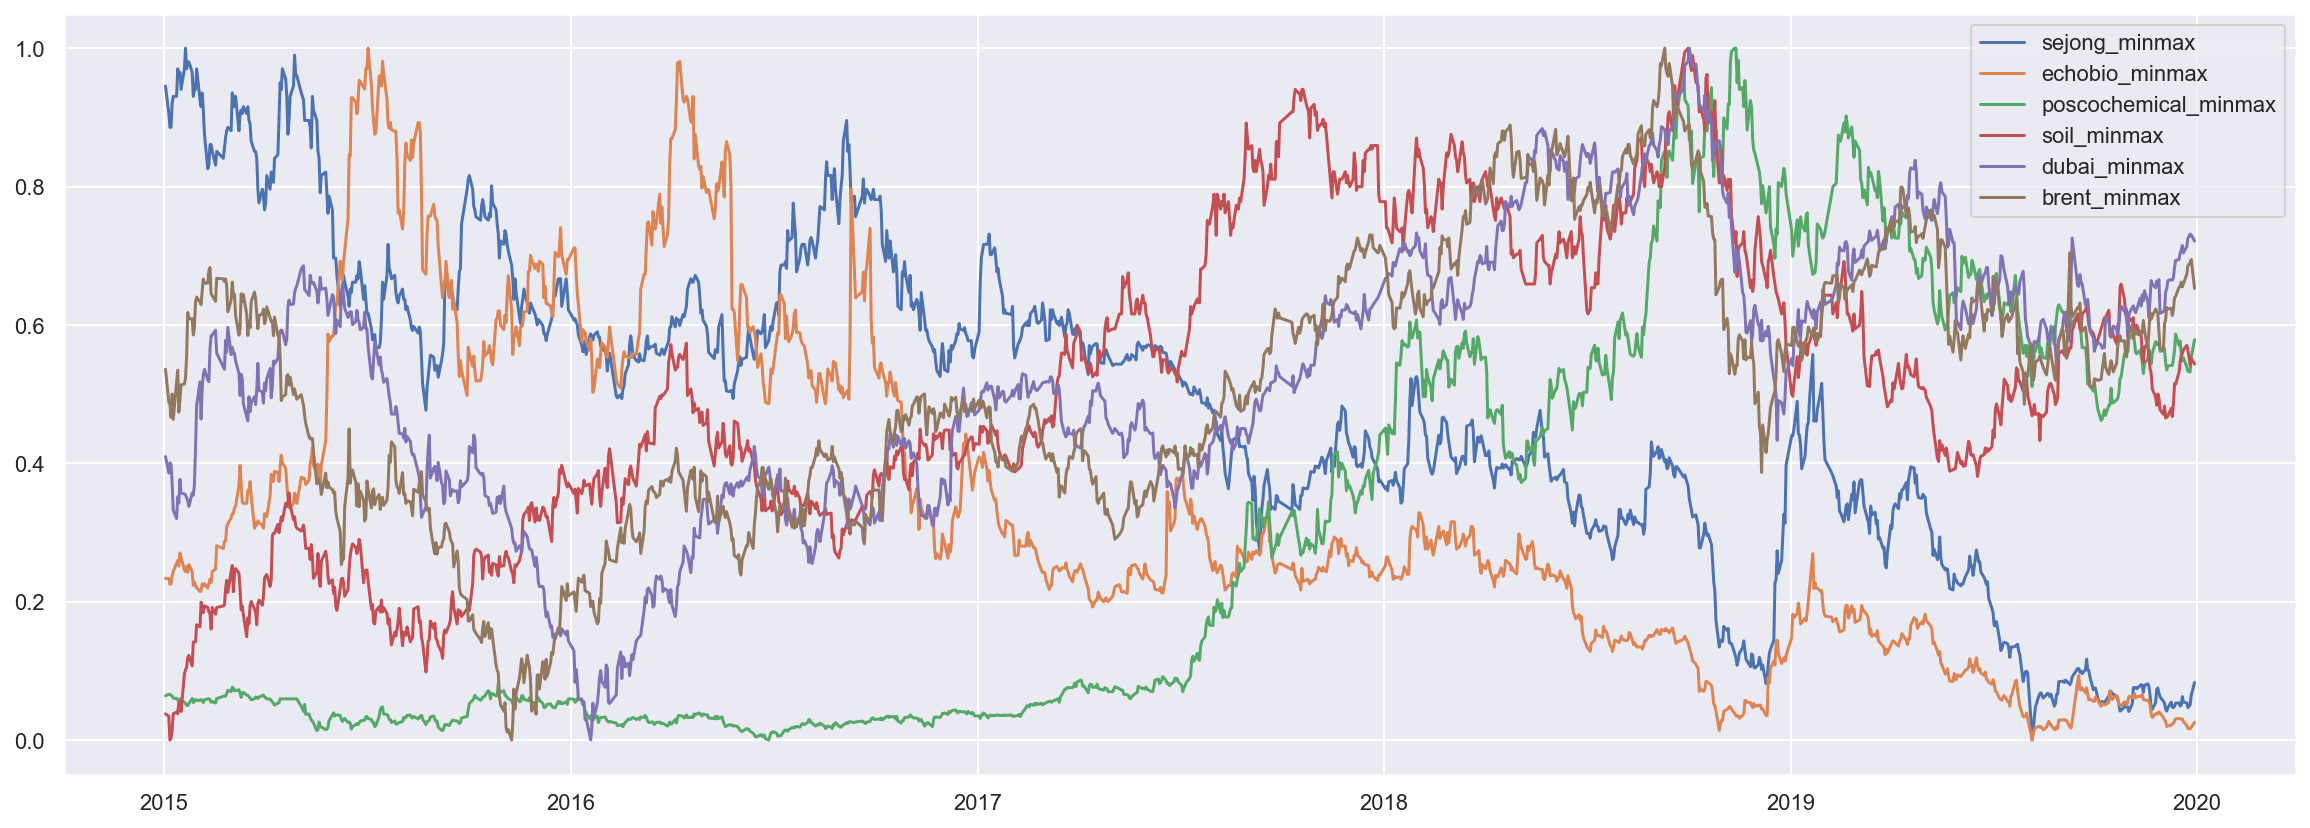

In [45]:
plt.figure(figsize=(20,7))

plt.plot(merge_df[::-1]["날짜"],preprocessing.minmax_scale(merge_df[::-1]["세종공업_현재가"]), label="sejong_minmax")

plt.plot(merge_df[::-1]["날짜"],preprocessing.minmax_scale(merge_df[::-1]["에코바이오_현재가"]), label="echobio_minmax")

plt.plot(merge_df[::-1]["날짜"], preprocessing.minmax_scale(merge_df[::-1]["포스코케미칼_현재가"]), label="poscochemical_minmax")

plt.plot(merge_df[::-1]["날짜"], preprocessing.minmax_scale(merge_df[::-1]["에스오일_현재가"]), label="soil_minmax")

plt.plot(merge_df[::-1]["날짜"], preprocessing.minmax_scale(merge_df[::-1]["두바이_종가"]), label="dubai_minmax")

plt.plot(merge_df[::-1]["날짜"], preprocessing.minmax_scale(merge_df[::-1]["Brent_종가"]), label="brent_minmax")

plt.legend(loc=0);